<a href="https://colab.research.google.com/github/nilabalasubramanian/AthleticsManagementSystem/blob/master/Copy_of_MainProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pycrypto

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 446.2/446.2 kB 16.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pycrypto: filename=pycrypto-2.6.1-cp310-cp310-linux_x86_64.whl size=499011 sha256=c6891ddda85576ad89e82e57d503ef3917ff9a47046540a21497ee7accff629a
  Stored in directory: /root/.cache/pip/wheels/e8/4b/5b/b10a6fc885057b6ff9fbd5691d7e700d0a9408f80b7e6f12e0
Successfully built pycrypto


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**AES**

In [ ]:
import hashlib
from Crypto import Random
from Crypto.Cipher import AES
from base64 import b64encode, b64decode

class AESCipher(object):
    def __init__(self, key):
        self.block_size = AES.block_size
        self.key = hashlib.sha256(key.encode()).digest()

    def encrypt(self, plain_text):
        plain_text = self.__pad(plain_text)
        iv = Random.new().read(self.block_size)
        cipher = AES.new(self.key, AES.MODE_CBC, iv)
        encrypted_text = cipher.encrypt(plain_text.encode())
        return b64encode(iv + encrypted_text).decode("utf-8")

    def decrypt(self, encrypted_text):
        encrypted_text = b64decode(encrypted_text)
        iv = encrypted_text[:self.block_size]
        cipher = AES.new(self.key, AES.MODE_CBC, iv)
        plain_text = cipher.decrypt(encrypted_text[self.block_size:]).decode("utf-8")
        return self.__unpad(plain_text)

    def __pad(self, plain_text):
        number_of_bytes_to_pad = self.block_size - len(plain_text) % self.block_size
        ascii_string = chr(number_of_bytes_to_pad)
        padding_str = number_of_bytes_to_pad * ascii_string
        padded_plain_text = plain_text + padding_str
        return padded_plain_text

    @staticmethod
    def __unpad(plain_text):
        last_character = plain_text[len(plain_text) - 1:]
        return plain_text[:-ord(last_character)]

In [ ]:
pip install -U PyCryptodome

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import time
time.clock = time.time
start = time.clock()
obj=AESCipher("sectefcf46453543453457gdsedxsf7")
a=obj.encrypt("123456aesalgorithm")
encrypt_duration = time.clock() - start
obj.decrypt(a)
decrypt_duration = time.clock() - encrypt_duration

print("Encryption took", encrypt_duration, "milliseconds")
print("Decryption took", decrypt_duration, "milliseconds")

ecomplex = time.time() - start
print("TimeComplexity",ecomplex)

Encryption took 0.0053441524505615234 milliseconds
Decryption took 1683451224.8264961 milliseconds
TimeComplexity 0.009272336959838867


**BlowFish**

In [ ]:

"""BlowFish.ipynb"""

p = [
      0x243F6A88, 0x85A308D3, 0x13198A2E, 0x03707344,
      0xA4093822, 0x299F31D0, 0x082EFA98, 0xEC4E6C89,
      0x452821E6, 0x38D01377, 0xBE5466CF, 0x34E90C6C,
      0xC0AC29B7, 0xC97C50DD, 0x3F84D5B5, 0xB5470917,
      0x9216D5D9, 0x8979FB1B
  ]

s = [
      [
          0xD1310BA6, 0x98DFB5AC, 0x2FFD72DB, 0xD01ADFB7,
          0xB8E1AFED, 0x6A267E96, 0xBA7C9045, 0xF12C7F99,
          0x24A19947, 0xB3916CF7, 0x0801F2E2, 0x858EFC16,
          0x636920D8, 0x71574E69, 0xA458FEA3, 0xF4933D7E,
          0x0D95748F, 0x728EB658, 0x718BCD58, 0x82154AEE,
          0x7B54A41D, 0xC25A59B5, 0x9C30D539, 0x2AF26013,
          0xC5D1B023, 0x286085F0, 0xCA417918, 0xB8DB38EF,
          0x8E79DCB0, 0x603A180E, 0x6C9E0E8B, 0xB01E8A3E,
          0xD71577C1, 0xBD314B27, 0x78AF2FDA, 0x55605C60,
          0xE65525F3, 0xAA55AB94, 0x57489862, 0x63E81440,
          0x55CA396A, 0x2AAB10B6, 0xB4CC5C34, 0x1141E8CE,
          0xA15486AF, 0x7C72E993, 0xB3EE1411, 0x636FBC2A,
          0x2BA9C55D, 0x741831F6, 0xCE5C3E16, 0x9B87931E,
          0xAFD6BA33, 0x6C24CF5C, 0x7A325381, 0x28958677,
          0x3B8F4898, 0x6B4BB9AF, 0xC4BFE81B, 0x66282193,
          0x61D809CC, 0xFB21A991, 0x487CAC60, 0x5DEC8032,
          0xEF845D5D, 0xE98575B1, 0xDC262302, 0xEB651B88,
          0x23893E81, 0xD396ACC5, 0x0F6D6FF3, 0x83F44239,
          0x2E0B4482, 0xA4842004, 0x69C8F04A, 0x9E1F9B5E,
          0x21C66842, 0xF6E96C9A, 0x670C9C61, 0xABD388F0,
          0x6A51A0D2, 0xD8542F68, 0x960FA728, 0xAB5133A3,
          0x6EEF0B6C, 0x137A3BE4, 0xBA3BF050, 0x7EFB2A98,
          0xA1F1651D, 0x39AF0176, 0x66CA593E, 0x82430E88,
          0x8CEE8619, 0x456F9FB4, 0x7D84A5C3, 0x3B8B5EBE,
          0xE06F75D8, 0x85C12073, 0x401A449F, 0x56C16AA6,
          0x4ED3AA62, 0x363F7706, 0x1BFEDF72, 0x429B023D,
          0x37D0D724, 0xD00A1248, 0xDB0FEAD3, 0x49F1C09B,
          0x075372C9, 0x80991B7B, 0x25D479D8, 0xF6E8DEF7,
          0xE3FE501A, 0xB6794C3B, 0x976CE0BD, 0x04C006BA,
          0xC1A94FB6, 0x409F60C4, 0x5E5C9EC2, 0x196A2463,
          0x68FB6FAF, 0x3E6C53B5, 0x1339B2EB, 0x3B52EC6F,
          0x6DFC511F, 0x9B30952C, 0xCC814544, 0xAF5EBD09,
          0xBEE3D004, 0xDE334AFD, 0x660F2807, 0x192E4BB3,
          0xC0CBA857, 0x45C8740F, 0xD20B5F39, 0xB9D3FBDB,
          0x5579C0BD, 0x1A60320A, 0xD6A100C6, 0x402C7279,
          0x679F25FE, 0xFB1FA3CC, 0x8EA5E9F8, 0xDB3222F8,
          0x3C7516DF, 0xFD616B15, 0x2F501EC8, 0xAD0552AB,
          0x323DB5FA, 0xFD238760, 0x53317B48, 0x3E00DF82,
          0x9E5C57BB, 0xCA6F8CA0, 0x1A87562E, 0xDF1769DB,
          0xD542A8F6, 0x287EFFC3, 0xAC6732C6, 0x8C4F5573,
          0x695B27B0, 0xBBCA58C8, 0xE1FFA35D, 0xB8F011A0,
          0x10FA3D98, 0xFD2183B8, 0x4AFCB56C, 0x2DD1D35B,
          0x9A53E479, 0xB6F84565, 0xD28E49BC, 0x4BFB9790,
          0xE1DDF2DA, 0xA4CB7E33, 0x62FB1341, 0xCEE4C6E8,
          0xEF20CADA, 0x36774C01, 0xD07E9EFE, 0x2BF11FB4,
          0x95DBDA4D, 0xAE909198, 0xEAAD8E71, 0x6B93D5A0,
          0xD08ED1D0, 0xAFC725E0, 0x8E3C5B2F, 0x8E7594B7,
          0x8FF6E2FB, 0xF2122B64, 0x8888B812, 0x900DF01C,
          0x4FAD5EA0, 0x688FC31C, 0xD1CFF191, 0xB3A8C1AD,
          0x2F2F2218, 0xBE0E1777, 0xEA752DFE, 0x8B021FA1,
          0xE5A0CC0F, 0xB56F74E8, 0x18ACF3D6, 0xCE89E299,
          0xB4A84FE0, 0xFD13E0B7, 0x7CC43B81, 0xD2ADA8D9,
          0x165FA266, 0x80957705, 0x93CC7314, 0x211A1477,
          0xE6AD2065, 0x77B5FA86, 0xC75442F5, 0xFB9D35CF,
          0xEBCDAF0C, 0x7B3E89A0, 0xD6411BD3, 0xAE1E7E49,
          0x00250E2D, 0x2071B35E, 0x226800BB, 0x57B8E0AF,
          0x2464369B, 0xF009B91E, 0x5563911D, 0x59DFA6AA,
          0x78C14389, 0xD95A537F, 0x207D5BA2, 0x02E5B9C5,
          0x83260376, 0x6295CFA9, 0x11C81968, 0x4E734A41,
          0xB3472DCA, 0x7B14A94A, 0x1B510052, 0x9A532915,
          0xD60F573F, 0xBC9BC6E4, 0x2B60A476, 0x81E67400,
          0x08BA6FB5, 0x571BE91F, 0xF296EC6B, 0x2A0DD915,
          0xB6636521, 0xE7B9F9B6, 0xFF34052E, 0xC5855664,
          0x53B02D5D, 0xA99F8FA1, 0x08BA4799, 0x6E85076A
      ],
      [
          0x4B7A70E9, 0xB5B32944, 0xDB75092E, 0xC4192623,
          0xAD6EA6B0, 0x49A7DF7D, 0x9CEE60B8, 0x8FEDB266,
          0xECAA8C71, 0x699A17FF, 0x5664526C, 0xC2B19EE1,
          0x193602A5, 0x75094C29, 0xA0591340, 0xE4183A3E,
          0x3F54989A, 0x5B429D65, 0x6B8FE4D6, 0x99F73FD6,
          0xA1D29C07, 0xEFE830F5, 0x4D2D38E6, 0xF0255DC1,
          0x4CDD2086, 0x8470EB26, 0x6382E9C6, 0x021ECC5E,
          0x09686B3F, 0x3EBAEFC9, 0x3C971814, 0x6B6A70A1,
          0x687F3584, 0x52A0E286, 0xB79C5305, 0xAA500737,
          0x3E07841C, 0x7FDEAE5C, 0x8E7D44EC, 0x5716F2B8,
          0xB03ADA37, 0xF0500C0D, 0xF01C1F04, 0x0200B3FF,
          0xAE0CF51A, 0x3CB574B2, 0x25837A58, 0xDC0921BD,
          0xD19113F9, 0x7CA92FF6, 0x94324773, 0x22F54701,
          0x3AE5E581, 0x37C2DADC, 0xC8B57634, 0x9AF3DDA7,
          0xA9446146, 0x0FD0030E, 0xECC8C73E, 0xA4751E41,
          0xE238CD99, 0x3BEA0E2F, 0x3280BBA1, 0x183EB331,
          0x4E548B38, 0x4F6DB908, 0x6F420D03, 0xF60A04BF,
          0x2CB81290, 0x24977C79, 0x5679B072, 0xBCAF89AF,
          0xDE9A771F, 0xD9930810, 0xB38BAE12, 0xDCCF3F2E,
          0x5512721F, 0x2E6B7124, 0x501ADDE6, 0x9F84CD87,
          0x7A584718, 0x7408DA17, 0xBC9F9ABC, 0xE94B7D8C,
          0xEC7AEC3A, 0xDB851DFA, 0x63094366, 0xC464C3D2,
          0xEF1C1847, 0x3215D908, 0xDD433B37, 0x24C2BA16,
          0x12A14D43, 0x2A65C451, 0x50940002, 0x133AE4DD,
          0x71DFF89E, 0x10314E55, 0x81AC77D6, 0x5F11199B,
          0x043556F1, 0xD7A3C76B, 0x3C11183B, 0x5924A509,
          0xF28FE6ED, 0x97F1FBFA, 0x9EBABF2C, 0x1E153C6E,
          0x86E34570, 0xEAE96FB1, 0x860E5E0A, 0x5A3E2AB3,
          0x771FE71C, 0x4E3D06FA, 0x2965DCB9, 0x99E71D0F,
          0x803E89D6, 0x5266C825, 0x2E4CC978, 0x9C10B36A,
          0xC6150EBA, 0x94E2EA78, 0xA5FC3C53, 0x1E0A2DF4,
          0xF2F74EA7, 0x361D2B3D, 0x1939260F, 0x19C27960,
          0x5223A708, 0xF71312B6, 0xEBADFE6E, 0xEAC31F66,
          0xE3BC4595, 0xA67BC883, 0xB17F37D1, 0x018CFF28,
          0xC332DDEF, 0xBE6C5AA5, 0x65582185, 0x68AB9802,
          0xEECEA50F, 0xDB2F953B, 0x2AEF7DAD, 0x5B6E2F84,
          0x1521B628, 0x29076170, 0xECDD4775, 0x619F1510,
          0x13CCA830, 0xEB61BD96, 0x0334FE1E, 0xAA0363CF,
          0xB5735C90, 0x4C70A239, 0xD59E9E0B, 0xCBAADE14,
          0xEECC86BC, 0x60622CA7, 0x9CAB5CAB, 0xB2F3846E,
          0x648B1EAF, 0x19BDF0CA, 0xA02369B9, 0x655ABB50,
          0x40685A32, 0x3C2AB4B3, 0x319EE9D5, 0xC021B8F7,
          0x9B540B19, 0x875FA099, 0x95F7997E, 0x623D7DA8,
          0xF837889A, 0x97E32D77, 0x11ED935F, 0x16681281,
          0x0E358829, 0xC7E61FD6, 0x96DEDFA1, 0x7858BA99,
          0x57F584A5, 0x1B227263, 0x9B83C3FF, 0x1AC24696,
          0xCDB30AEB, 0x532E3054, 0x8FD948E4, 0x6DBC3128,
          0x58EBF2EF, 0x34C6FFEA, 0xFE28ED61, 0xEE7C3C73,
          0x5D4A14D9, 0xE864B7E3, 0x42105D14, 0x203E13E0,
          0x45EEE2B6, 0xA3AAABEA, 0xDB6C4F15, 0xFACB4FD0,
          0xC742F442, 0xEF6ABBB5, 0x654F3B1D, 0x41CD2105,
          0xD81E799E, 0x86854DC7, 0xE44B476A, 0x3D816250,
          0xCF62A1F2, 0x5B8D2646, 0xFC8883A0, 0xC1C7B6A3,
          0x7F1524C3, 0x69CB7492, 0x47848A0B, 0x5692B285,
          0x095BBF00, 0xAD19489D, 0x1462B174, 0x23820E00,
          0x58428D2A, 0x0C55F5EA, 0x1DADF43E, 0x233F7061,
          0x3372F092, 0x8D937E41, 0xD65FECF1, 0x6C223BDB,
          0x7CDE3759, 0xCBEE7460, 0x4085F2A7, 0xCE77326E,
          0xA6078084, 0x19F8509E, 0xE8EFD855, 0x61D99735,
          0xA969A7AA, 0xC50C06C2, 0x5A04ABFC, 0x800BCADC,
          0x9E447A2E, 0xC3453484, 0xFDD56705, 0x0E1E9EC9,
          0xDB73DBD3, 0x105588CD, 0x675FDA79, 0xE3674340,
          0xC5C43465, 0x713E38D8, 0x3D28F89E, 0xF16DFF20,
          0x153E21E7, 0x8FB03D4A, 0xE6E39F2B, 0xDB83ADF7
      ],
      [
          0xE93D5A68, 0x948140F7, 0xF64C261C, 0x94692934,
          0x411520F7, 0x7602D4F7, 0xBCF46B2E, 0xD4A20068,
          0xD4082471, 0x3320F46A, 0x43B7D4B7, 0x500061AF,
          0x1E39F62E, 0x97244546, 0x14214F74, 0xBF8B8840,
          0x4D95FC1D, 0x96B591AF, 0x70F4DDD3, 0x66A02F45,
          0xBFBC09EC, 0x03BD9785, 0x7FAC6DD0, 0x31CB8504,
          0x96EB27B3, 0x55FD3941, 0xDA2547E6, 0xABCA0A9A,
          0x28507825, 0x530429F4, 0x0A2C86DA, 0xE9B66DFB,
          0x68DC1462, 0xD7486900, 0x680EC0A4, 0x27A18DEE,
          0x4F3FFEA2, 0xE887AD8C, 0xB58CE006, 0x7AF4D6B6,
          0xAACE1E7C, 0xD3375FEC, 0xCE78A399, 0x406B2A42,
          0x20FE9E35, 0xD9F385B9, 0xEE39D7AB, 0x3B124E8B,
          0x1DC9FAF7, 0x4B6D1856, 0x26A36631, 0xEAE397B2,
          0x3A6EFA74, 0xDD5B4332, 0x6841E7F7, 0xCA7820FB,
          0xFB0AF54E, 0xD8FEB397, 0x454056AC, 0xBA489527,
          0x55533A3A, 0x20838D87, 0xFE6BA9B7, 0xD096954B,
          0x55A867BC, 0xA1159A58, 0xCCA92963, 0x99E1DB33,
          0xA62A4A56, 0x3F3125F9, 0x5EF47E1C, 0x9029317C,
          0xFDF8E802, 0x04272F70, 0x80BB155C, 0x05282CE3,
          0x95C11548, 0xE4C66D22, 0x48C1133F, 0xC70F86DC,
          0x07F9C9EE, 0x41041F0F, 0x404779A4, 0x5D886E17,
          0x325F51EB, 0xD59BC0D1, 0xF2BCC18F, 0x41113564,
          0x257B7834, 0x602A9C60, 0xDFF8E8A3, 0x1F636C1B,
          0x0E12B4C2, 0x02E1329E, 0xAF664FD1, 0xCAD18115,
          0x6B2395E0, 0x333E92E1, 0x3B240B62, 0xEEBEB922,
          0x85B2A20E, 0xE6BA0D99, 0xDE720C8C, 0x2DA2F728,
          0xD0127845, 0x95B794FD, 0x647D0862, 0xE7CCF5F0,
          0x5449A36F, 0x877D48FA, 0xC39DFD27, 0xF33E8D1E,
          0x0A476341, 0x992EFF74, 0x3A6F6EAB, 0xF4F8FD37,
          0xA812DC60, 0xA1EBDDF8, 0x991BE14C, 0xDB6E6B0D,
          0xC67B5510, 0x6D672C37, 0x2765D43B, 0xDCD0E804,
          0xF1290DC7, 0xCC00FFA3, 0xB5390F92, 0x690FED0B,
          0x667B9FFB, 0xCEDB7D9C, 0xA091CF0B, 0xD9155EA3,
          0xBB132F88, 0x515BAD24, 0x7B9479BF, 0x763BD6EB,
          0x37392EB3, 0xCC115979, 0x8026E297, 0xF42E312D,
          0x6842ADA7, 0xC66A2B3B, 0x12754CCC, 0x782EF11C,
          0x6A124237, 0xB79251E7, 0x06A1BBE6, 0x4BFB6350,
          0x1A6B1018, 0x11CAEDFA, 0x3D25BDD8, 0xE2E1C3C9,
          0x44421659, 0x0A121386, 0xD90CEC6E, 0xD5ABEA2A,
          0x64AF674E, 0xDA86A85F, 0xBEBFE988, 0x64E4C3FE,
          0x9DBC8057, 0xF0F7C086, 0x60787BF8, 0x6003604D,
          0xD1FD8346, 0xF6381FB0, 0x7745AE04, 0xD736FCCC,
          0x83426B33, 0xF01EAB71, 0xB0804187, 0x3C005E5F,
          0x77A057BE, 0xBDE8AE24, 0x55464299, 0xBF582E61,
          0x4E58F48F, 0xF2DDFDA2, 0xF474EF38, 0x8789BDC2,
          0x5366F9C3, 0xC8B38E74, 0xB475F255, 0x46FCD9B9,
          0x7AEB2661, 0x8B1DDF84, 0x846A0E79, 0x915F95E2,
          0x466E598E, 0x20B45770, 0x8CD55591, 0xC902DE4C,
          0xB90BACE1, 0xBB8205D0, 0x11A86248, 0x7574A99E,
          0xB77F19B6, 0xE0A9DC09, 0x662D09A1, 0xC4324633,
          0xE85A1F02, 0x09F0BE8C, 0x4A99A025, 0x1D6EFE10,
          0x1AB93D1D, 0x0BA5A4DF, 0xA186F20F, 0x2868F169,
          0xDCB7DA83, 0x573906FE, 0xA1E2CE9B, 0x4FCD7F52,
          0x50115E01, 0xA70683FA, 0xA002B5C4, 0x0DE6D027,
          0x9AF88C27, 0x773F8641, 0xC3604C06, 0x61A806B5,
          0xF0177A28, 0xC0F586E0, 0x006058AA, 0x30DC7D62,
          0x11E69ED7, 0x2338EA63, 0x53C2DD94, 0xC2C21634,
          0xBBCBEE56, 0x90BCB6DE, 0xEBFC7DA1, 0xCE591D76,
          0x6F05E409, 0x4B7C0188, 0x39720A3D, 0x7C927C24,
          0x86E3725F, 0x724D9DB9, 0x1AC15BB4, 0xD39EB8FC,
          0xED545578, 0x08FCA5B5, 0xD83D7CD3, 0x4DAD0FC4,
          0x1E50EF5E, 0xB161E6F8, 0xA28514D9, 0x6C51133C,
          0x6FD5C7E7, 0x56E14EC4, 0x362ABFCE, 0xDDC6C837,
          0xD79A3234, 0x92638212, 0x670EFA8E, 0x406000E0
      ],
      [
          0x3A39CE37, 0xD3FAF5CF, 0xABC27737, 0x5AC52D1B,
          0x5CB0679E, 0x4FA33742, 0xD3822740, 0x99BC9BBE,
          0xD5118E9D, 0xBF0F7315, 0xD62D1C7E, 0xC700C47B,
          0xB78C1B6B, 0x21A19045, 0xB26EB1BE, 0x6A366EB4,
          0x5748AB2F, 0xBC946E79, 0xC6A376D2, 0x6549C2C8,
          0x530FF8EE, 0x468DDE7D, 0xD5730A1D, 0x4CD04DC6,
          0x2939BBDB, 0xA9BA4650, 0xAC9526E8, 0xBE5EE304,
          0xA1FAD5F0, 0x6A2D519A, 0x63EF8CE2, 0x9A86EE22,
          0xC089C2B8, 0x43242EF6, 0xA51E03AA, 0x9CF2D0A4,
          0x83C061BA, 0x9BE96A4D, 0x8FE51550, 0xBA645BD6,
          0x2826A2F9, 0xA73A3AE1, 0x4BA99586, 0xEF5562E9,
          0xC72FEFD3, 0xF752F7DA, 0x3F046F69, 0x77FA0A59,
          0x80E4A915, 0x87B08601, 0x9B09E6AD, 0x3B3EE593,
          0xE990FD5A, 0x9E34D797, 0x2CF0B7D9, 0x022B8B51,
          0x96D5AC3A, 0x017DA67D, 0xD1CF3ED6, 0x7C7D2D28,
          0x1F9F25CF, 0xADF2B89B, 0x5AD6B472, 0x5A88F54C,
          0xE029AC71, 0xE019A5E6, 0x47B0ACFD, 0xED93FA9B,
          0xE8D3C48D, 0x283B57CC, 0xF8D56629, 0x79132E28,
          0x785F0191, 0xED756055, 0xF7960E44, 0xE3D35E8C,
          0x15056DD4, 0x88F46DBA, 0x03A16125, 0x0564F0BD,
          0xC3EB9E15, 0x3C9057A2, 0x97271AEC, 0xA93A072A,
          0x1B3F6D9B, 0x1E6321F5, 0xF59C66FB, 0x26DCF319,
          0x7533D928, 0xB155FDF5, 0x03563482, 0x8ABA3CBB,
          0x28517711, 0xC20AD9F8, 0xABCC5167, 0xCCAD925F,
          0x4DE81751, 0x3830DC8E, 0x379D5862, 0x9320F991,
          0xEA7A90C2, 0xFB3E7BCE, 0x5121CE64, 0x774FBE32,
          0xA8B6E37E, 0xC3293D46, 0x48DE5369, 0x6413E680,
          0xA2AE0810, 0xDD6DB224, 0x69852DFD, 0x09072166,
          0xB39A460A, 0x6445C0DD, 0x586CDECF, 0x1C20C8AE,
          0x5BBEF7DD, 0x1B588D40, 0xCCD2017F, 0x6BB4E3BB,
          0xDDA26A7E, 0x3A59FF45, 0x3E350A44, 0xBCB4CDD5,
          0x72EACEA8, 0xFA6484BB, 0x8D6612AE, 0xBF3C6F47,
          0xD29BE463, 0x542F5D9E, 0xAEC2771B, 0xF64E6370,
          0x740E0D8D, 0xE75B1357, 0xF8721671, 0xAF537D5D,
          0x4040CB08, 0x4EB4E2CC, 0x34D2466A, 0x0115AF84,
          0xE1B00428, 0x95983A1D, 0x06B89FB4, 0xCE6EA048,
          0x6F3F3B82, 0x3520AB82, 0x011A1D4B, 0x277227F8,
          0x611560B1, 0xE7933FDC, 0xBB3A792B, 0x344525BD,
          0xA08839E1, 0x51CE794B, 0x2F32C9B7, 0xA01FBAC9,
          0xE01CC87E, 0xBCC7D1F6, 0xCF0111C3, 0xA1E8AAC7,
          0x1A908749, 0xD44FBD9A, 0xD0DADECB, 0xD50ADA38,
          0x0339C32A, 0xC6913667, 0x8DF9317C, 0xE0B12B4F,
          0xF79E59B7, 0x43F5BB3A, 0xF2D519FF, 0x27D9459C,
          0xBF97222C, 0x15E6FC2A, 0x0F91FC71, 0x9B941525,
          0xFAE59361, 0xCEB69CEB, 0xC2A86459, 0x12BAA8D1,
          0xB6C1075E, 0xE3056A0C, 0x10D25065, 0xCB03A442,
          0xE0EC6E0E, 0x1698DB3B, 0x4C98A0BE, 0x3278E964,
          0x9F1F9532, 0xE0D392DF, 0xD3A0342B, 0x8971F21E,
          0x1B0A7441, 0x4BA3348C, 0xC5BE7120, 0xC37632D8,
          0xDF359F8D, 0x9B992F2E, 0xE60B6F47, 0x0FE3F11D,
          0xE54CDA54, 0x1EDAD891, 0xCE6279CF, 0xCD3E7E6F,
          0x1618B166, 0xFD2C1D05, 0x848FD2C5, 0xF6FB2299,
          0xF523F357, 0xA6327623, 0x93A83531, 0x56CCCD02,
          0xACF08162, 0x5A75EBB5, 0x6E163697, 0x88D273CC,
          0xDE966292, 0x81B949D0, 0x4C50901B, 0x71C65614,
          0xE6C6C7BD, 0x327A140A, 0x45E1D006, 0xC3F27B9A,
          0xC9AA53FD, 0x62A80F00, 0xBB25BFE2, 0x35BDD2F6,
          0x71126905, 0xB2040222, 0xB6CBCF7C, 0xCD769C2B,
          0x53113EC0, 0x1640E3D3, 0x38ABBD60, 0x2547ADF0,
          0xBA38209C, 0xF746CE76, 0x77AFA1C5, 0x20756060,
          0x85CBFE4E, 0x8AE88DD8, 0x7AAAF9B0, 0x4CF9AA7E,
          0x1948C25C, 0x02FB8A8C, 0x01C36AE4, 0xD6EBE1F9,
          0x90D4F869, 0xA65CDEA0, 0x3F09252D, 0xC208E69F,
          0xB74E6132, 0xCE77E25B, 0x578FDFE3, 0x3AC372E6
      ]
]


key = [ 0x4B7A70E9, 0xB5B32944, 0xDB75092E, 0xC4192623,
        0xAD6EA6B0, 0x49A7DF7D, 0x9CEE60B8, 0x8FEDB266,
        0xECAA8C71, 0x699A17FF, 0x5664526C, 0xC2B19EE1,
        0x193602A5, 0x75094C29]

p_new = p.copy()

def swap(a,b):
    temp = a
    a = b
    b = temp
    return a,b

def driver():
        for i in range(0,18):
                p[i] = p[i]^key[i%14]
        k = 0
        data = 0
        for i in range(0,9):
            temp = encryption(data)
            p[k] = temp >> 32
            k+=1
            p[k] = temp & 0xffffffff
            k+=1
            data = temp
        encrypt_data = int(input("Enter data to encrypt: "))
        encrypted_data = encryption(encrypt_data)
        print("Encrypted data : ",encrypted_data)
        decrypted_data = decryption(encrypted_data)
        print("Decrypted data : ",decrypted_data) 

def encryption(data):
        L = data>>32
        R = data & 0xffffffff
        for i in range(0,16):
                L = p[i]^L
                L1 = func(L)
                R = R^func(L1)
                L,R = swap(L,R)
        L,R = swap(L,R)
        L = L^p[17]
        R = R^p[16]
        encrypted = (L<<32) ^ R
        return encrypted


def func(L):
    temp = s[0][L >> 24]
    temp = (temp + s[1][L >> 16 & 0xff]) % 2**32
    temp = temp ^ s[2][L >> 8 & 0xff]
    temp = (temp + s[3][L & 0xff]) % 2**32
    return temp

def decryption(data):
    L = data >> 32
    R = data & 0xffffffff
    for i in range(17, 1, -1):
        L = p[i]^L
        L1 = func(L)
        R = R^func(L1)
        L,R = swap(L,R)
    L,R = swap(L,R)
    L = L^p[0]
    R = R^p[1]
    decrypted_data1 = (L<<32) ^ R
    return decrypted_data1
driver()
import time
time.clock = time.time
start = time.clock()
data = 45
a = encryption(data)
encrypted_text = time.clock() - start

b=decryption(a)
decrypted_text = time.clock() - encrypted_text
print("Encrypted Text",encrypted_text)
print("Decrypted Text",decrypted_text)
ecom = time.time() - start
print("Time Complexity",ecom)

Enter data to encrypt: 45
Encrypted data :  4514996536258552110
Decrypted data :  45
Encrypted Text 0.0002701282501220703
Decrypted Text 1683451259.5271924
Time Complexity 0.0025322437286376953


**RSA**

In [ ]:

"""RSA_Final.ipynb"""
import math
 
# step 1
p = 3
q = 7
 
# step 2
n = p*q
print("n =", n)
 
# step 3
phi = (p-1)*(q-1)
 
# step 4
e = 2
while(e<phi):
    if (math.gcd(e, phi) == 1):
        break
    else:
        e += 1
 
print("e =", e)
# step 5
k = 2
d = ((k*phi)+1)/e
print("d =", d)
print(f'Public key: {e, n}')
print(f'Private key: {d, n}')
 
# plain text
msg = 11
#print(f'Original message:{msg}')
 
# encryption
def encryption():
 C = pow(msg, e)
 C = math.fmod(C, n)
 return C
#print(f'Encrypted message: {C}')
 
# decryption
def decryption():
 M = pow(C, d)
 M = math.fmod(M, n)
 return M
#print(f'Decrypted message: {M}')

import time
time.clock = time.time
start = time.clock()
encryption()
encrypted_text = time.clock() - start
decryption
decrypted_text = time.clock() - encrypted_text
print('Encrypted text',encrypted_text,'in milliseconds')
print('Decrypted text',decrypted_text,'in millseconds')
ecom = time.time() - start
print("Time Complexity",ecom)

n = 21
e = 5
d = 5.0
Public key: (5, 21)
Private key: (5.0, 21)
Encrypted text 8.344650268554688e-05 in milliseconds
Decrypted text 1683451271.9030452 in millseconds
Time Complexity 0.001979351043701172


**Elgamal**

In [ ]:

"""ElgamalFinal.ipynb"""


import random
import time
from math import pow

a = random.randint(2, 10)

def gcd(a, b):
	if a < b:
		return gcd(b, a)
	elif a % b == 0:
		return b;
	else:
		return gcd(b, a % b)

# Generating large random numbers
def gen_key(q):

	key = random.randint(pow(10, 20), q)
	while gcd(q, key) != 1:
		key = random.randint(pow(10, 20), q)

	return key

# Modular exponentiation
def power(a, b, c):
	x = 1
	y = a

	while b > 0:
		if b % 2 != 0:
			x = (x * y) % c;
		y = (y * y) % c
		b = int(b / 2)

	return x % c

# Asymmetric encryption
def encrypt(msg, q, h, g):

	en_msg = []

	k = gen_key(q)# Private key for sender
	s = power(h, k, q)
	p = power(g, k, q)
	
	for i in range(0, len(msg)):
		en_msg.append(msg[i])

	print("g^k used : ", p)
	print("g^ak used : ", s)
	for i in range(0, len(en_msg)):
		en_msg[i] = s * ord(en_msg[i])

	return en_msg, p

def decrypt(en_msg, p, key, q):

	dr_msg = []
	h = power(p, key, q)
	for i in range(0, len(en_msg)):
		dr_msg.append(chr(int(en_msg[i]/h)))
		
	return dr_msg

# Driver code
def main():

	msg = 'encryption'
	print("Original Message :", msg)

	q = random.randint(pow(10, 20), pow(10, 50))
	g = random.randint(2, q)

	key = gen_key(q)# Private key for receiver
	h = power(g, key, q)
	print("g used : ", g)
	print("g^a used : ", h)

	en_msg, p = encrypt(msg, q, h, g)
	dr_msg = decrypt(en_msg, p, key, q)
	dmsg = ''.join(dr_msg)
	print("Decrypted Message :", dmsg);

  


if __name__ == '__main__':
	main()

import time
time.clock = time.time
start = time.clock()
msg = 'encryption'
q = random.randint(pow(10, 20), pow(10, 50))
g = random.randint(2, q)
key = gen_key(q)# Private key for receiver
h = power(g, key, q)
en_msg, p = encrypt(msg, q, h, g)
encrypt_duration = time.clock() - start
decrypt(en_msg, p, key, q)  
decrypt_duration = time.clock() - encrypt_duration

print("Encryption took", encrypt_duration, "milliseconds")
print("Decryption took", decrypt_duration, "milliseconds")
ecom = time.time() - start
print("Time Complexity",ecom)


Original Message : encryption
g used :  8471018678310936200926255025630717550124565861227
g^a used :  43746914743464292989423402234117018042050859017827
g^k used :  30386332468762154406356772965984842851570040948267
g^ak used :  33513362583046745250954187598527107859430363246947
Decrypted Message : encryption
g^k used :  9518938330143768526898353111412854659203832533365
g^ak used :  15131515797770902263403300949428180543936076506621
Encryption took 0.007541656494140625 milliseconds
Decryption took 1683451286.8921094 milliseconds
Time Complexity 0.008174419403076172


**DES**

In [ ]:
# -- coding: utf-8 --
"""DES_Final.ipynb"""


# Hexadecimal to binary conversion
import time

def hex2bin(s):
	mp = {'0': "0000",
		'1': "0001",
		'2': "0010",
		'3': "0011",
		'4': "0100",
		'5': "0101",
		'6': "0110",
		'7': "0111",
		'8': "1000",
		'9': "1001",
		'A': "1010",
		'B': "1011",
		'C': "1100",
		'D': "1101",
		'E': "1110",
		'F': "1111"}
	bin = ""
	for i in range(len(s)):
		bin = bin + mp[s[i]]
	return bin

# Binary to hexadecimal conversion


def bin2hex(s):
	mp = {"0000": '0',
		"0001": '1',
		"0010": '2',
		"0011": '3',
		"0100": '4',
		"0101": '5',
		"0110": '6',
		"0111": '7',
		"1000": '8',
		"1001": '9',
		"1010": 'A',
		"1011": 'B',
		"1100": 'C',
		"1101": 'D',
		"1110": 'E',
		"1111": 'F'}
	hex = ""
	for i in range(0, len(s), 4):
		ch = ""
		ch = ch + s[i]
		ch = ch + s[i + 1]
		ch = ch + s[i + 2]
		ch = ch + s[i + 3]
		hex = hex + mp[ch]

	return hex

# Binary to decimal conversion


def bin2dec(binary):

	binary1 = binary
	decimal, i, n = 0, 0, 0
	while(binary != 0):
		dec = binary % 10
		decimal = decimal + dec * pow(2, i)
		binary = binary//10
		i += 1
	return decimal

# Decimal to binary conversion


def dec2bin(num):
	res = bin(num).replace("0b", "")
	if(len(res) % 4 != 0):
		div = len(res) / 4
		div = int(div)
		counter = (4 * (div + 1)) - len(res)
		for i in range(0, counter):
			res = '0' + res
	return res

# Permute function to rearrange the bits


def permute(k, arr, n):
	permutation = ""
	for i in range(0, n):
		permutation = permutation + k[arr[i] - 1]
	return permutation

# shifting the bits towards left by nth shifts


def shift_left(k, nth_shifts):
	s = ""
	for i in range(nth_shifts):
		for j in range(1, len(k)):
			s = s + k[j]
		s = s + k[0]
		k = s
		s = ""
	return k

# calculating xow of two strings of binary number a and b


def xor(a, b):
	ans = ""
	for i in range(len(a)):
		if a[i] == b[i]:
			ans = ans + "0"
		else:
			ans = ans + "1"
	return ans


# Table of Position of 64 bits at initial level: Initial Permutation Table
initial_perm = [58, 50, 42, 34, 26, 18, 10, 2,
				60, 52, 44, 36, 28, 20, 12, 4,
				62, 54, 46, 38, 30, 22, 14, 6,
				64, 56, 48, 40, 32, 24, 16, 8,
				57, 49, 41, 33, 25, 17, 9, 1,
				59, 51, 43, 35, 27, 19, 11, 3,
				61, 53, 45, 37, 29, 21, 13, 5,
				63, 55, 47, 39, 31, 23, 15, 7]

# Expansion D-box Table
exp_d = [32, 1, 2, 3, 4, 5, 4, 5,
		6, 7, 8, 9, 8, 9, 10, 11,
		12, 13, 12, 13, 14, 15, 16, 17,
		16, 17, 18, 19, 20, 21, 20, 21,
		22, 23, 24, 25, 24, 25, 26, 27,
		28, 29, 28, 29, 30, 31, 32, 1]

# Straight Permutation Table
per = [16, 7, 20, 21,
	29, 12, 28, 17,
	1, 15, 23, 26,
	5, 18, 31, 10,
	2, 8, 24, 14,
	32, 27, 3, 9,
	19, 13, 30, 6,
	22, 11, 4, 25]

# S-box Table
sbox = [[[14, 4, 13, 1, 2, 15, 11, 8, 3, 10, 6, 12, 5, 9, 0, 7],
		[0, 15, 7, 4, 14, 2, 13, 1, 10, 6, 12, 11, 9, 5, 3, 8],
		[4, 1, 14, 8, 13, 6, 2, 11, 15, 12, 9, 7, 3, 10, 5, 0],
		[15, 12, 8, 2, 4, 9, 1, 7, 5, 11, 3, 14, 10, 0, 6, 13]],

		[[15, 1, 8, 14, 6, 11, 3, 4, 9, 7, 2, 13, 12, 0, 5, 10],
		[3, 13, 4, 7, 15, 2, 8, 14, 12, 0, 1, 10, 6, 9, 11, 5],
		[0, 14, 7, 11, 10, 4, 13, 1, 5, 8, 12, 6, 9, 3, 2, 15],
		[13, 8, 10, 1, 3, 15, 4, 2, 11, 6, 7, 12, 0, 5, 14, 9]],

		[[10, 0, 9, 14, 6, 3, 15, 5, 1, 13, 12, 7, 11, 4, 2, 8],
		[13, 7, 0, 9, 3, 4, 6, 10, 2, 8, 5, 14, 12, 11, 15, 1],
		[13, 6, 4, 9, 8, 15, 3, 0, 11, 1, 2, 12, 5, 10, 14, 7],
		[1, 10, 13, 0, 6, 9, 8, 7, 4, 15, 14, 3, 11, 5, 2, 12]],

		[[7, 13, 14, 3, 0, 6, 9, 10, 1, 2, 8, 5, 11, 12, 4, 15],
		[13, 8, 11, 5, 6, 15, 0, 3, 4, 7, 2, 12, 1, 10, 14, 9],
		[10, 6, 9, 0, 12, 11, 7, 13, 15, 1, 3, 14, 5, 2, 8, 4],
		[3, 15, 0, 6, 10, 1, 13, 8, 9, 4, 5, 11, 12, 7, 2, 14]],

		[[2, 12, 4, 1, 7, 10, 11, 6, 8, 5, 3, 15, 13, 0, 14, 9],
		[14, 11, 2, 12, 4, 7, 13, 1, 5, 0, 15, 10, 3, 9, 8, 6],
		[4, 2, 1, 11, 10, 13, 7, 8, 15, 9, 12, 5, 6, 3, 0, 14],
		[11, 8, 12, 7, 1, 14, 2, 13, 6, 15, 0, 9, 10, 4, 5, 3]],

		[[12, 1, 10, 15, 9, 2, 6, 8, 0, 13, 3, 4, 14, 7, 5, 11],
		[10, 15, 4, 2, 7, 12, 9, 5, 6, 1, 13, 14, 0, 11, 3, 8],
		[9, 14, 15, 5, 2, 8, 12, 3, 7, 0, 4, 10, 1, 13, 11, 6],
		[4, 3, 2, 12, 9, 5, 15, 10, 11, 14, 1, 7, 6, 0, 8, 13]],

		[[4, 11, 2, 14, 15, 0, 8, 13, 3, 12, 9, 7, 5, 10, 6, 1],
		[13, 0, 11, 7, 4, 9, 1, 10, 14, 3, 5, 12, 2, 15, 8, 6],
		[1, 4, 11, 13, 12, 3, 7, 14, 10, 15, 6, 8, 0, 5, 9, 2],
		[6, 11, 13, 8, 1, 4, 10, 7, 9, 5, 0, 15, 14, 2, 3, 12]],

		[[13, 2, 8, 4, 6, 15, 11, 1, 10, 9, 3, 14, 5, 0, 12, 7],
		[1, 15, 13, 8, 10, 3, 7, 4, 12, 5, 6, 11, 0, 14, 9, 2],
		[7, 11, 4, 1, 9, 12, 14, 2, 0, 6, 10, 13, 15, 3, 5, 8],
		[2, 1, 14, 7, 4, 10, 8, 13, 15, 12, 9, 0, 3, 5, 6, 11]]]

# Final Permutation Table
final_perm = [40, 8, 48, 16, 56, 24, 64, 32,
			39, 7, 47, 15, 55, 23, 63, 31,
			38, 6, 46, 14, 54, 22, 62, 30,
			37, 5, 45, 13, 53, 21, 61, 29,
			36, 4, 44, 12, 52, 20, 60, 28,
			35, 3, 43, 11, 51, 19, 59, 27,
			34, 2, 42, 10, 50, 18, 58, 26,
			33, 1, 41, 9, 49, 17, 57, 25]


def encrypt(pt, rkb, rk):
	pt = hex2bin(pt)

	# Initial Permutation
	pt = permute(pt, initial_perm, 64)
	print("After initial permutation", bin2hex(pt))

	# Splitting
	left = pt[0:32]
	right = pt[32:64]
	for i in range(0, 16):
		# Expansion D-box: Expanding the 32 bits data into 48 bits
		right_expanded = permute(right, exp_d, 48)

		# XOR RoundKey[i] and right_expanded
		xor_x = xor(right_expanded, rkb[i])

		# S-boxex: substituting the value from s-box table by calculating row and column
		sbox_str = ""
		for j in range(0, 8):
			row = bin2dec(int(xor_x[j * 6] + xor_x[j * 6 + 5]))
			col = bin2dec(int(xor_x[j * 6 + 1] + xor_x[j * 6 + 2] + xor_x[j * 6 + 3] + xor_x[j * 6 + 4]))
			val = sbox[j][int(row)][int(col)]
			sbox_str = sbox_str + dec2bin(val)

		# Straight D-box: After substituting rearranging the bits
		sbox_str = permute(sbox_str, per, 32)

		# XOR left and sbox_str
		result = xor(left, sbox_str)
		left = result

		# Swapper
		if(i != 15):
			left, right = right, left
		print("Round ", i + 1, " ", bin2hex(left)," ", bin2hex(right), " ", rk[i])

	# Combination
	combine = left + right

	# Final permutation: final rearranging of bits to get cipher text
	cipher_text = permute(combine, final_perm, 64)
	return cipher_text


pt = "123456ABCD132536"
key = "AABB09182736CCDD"

# Key generation
# --hex to binary
key = hex2bin(key)

# --parity bit drop table
keyp = [57, 49, 41, 33, 25, 17, 9,
		1, 58, 50, 42, 34, 26, 18,
		10, 2, 59, 51, 43, 35, 27,
		19, 11, 3, 60, 52, 44, 36,
		63, 55, 47, 39, 31, 23, 15,
		7, 62, 54, 46, 38, 30, 22,
		14, 6, 61, 53, 45, 37, 29,
		21, 13, 5, 28, 20, 12, 4]

# getting 56 bit key from 64 bit using the parity bits
key = permute(key, keyp, 56)

# Number of bit shifts
shift_table = [1, 1, 2, 2,
			2, 2, 2, 2,
			1, 2, 2, 2,
			2, 2, 2, 1]

# Key- Compression Table : Compression of key from 56 bits to 48 bits
key_comp = [14, 17, 11, 24, 1, 5,
			3, 28, 15, 6, 21, 10,
			23, 19, 12, 4, 26, 8,
			16, 7, 27, 20, 13, 2,
			41, 52, 31, 37, 47, 55,
			30, 40, 51, 45, 33, 48,
			44, 49, 39, 56, 34, 53,
			46, 42, 50, 36, 29, 32]

# Splitting
left = key[0:28] # rkb for RoundKeys in binary
right = key[28:56] # rk for RoundKeys in hexadecimal

rkb = []
rk = []
for i in range(0, 16):
	# Shifting the bits by nth shifts by checking from shift table
	left = shift_left(left, shift_table[i])
	right = shift_left(right, shift_table[i])

	# Combination of left and right string
	combine_str = left + right

	# Compression of key from 56 to 48 bits
	round_key = permute(combine_str, key_comp, 48)

	rkb.append(round_key)
	rk.append(bin2hex(round_key))

print("Encryption")
cipher_text = bin2hex(encrypt(pt, rkb, rk))
print("Cipher Text : ", cipher_text)

print("Decryption")
rkb_rev = rkb[::-1]
rk_rev = rk[::-1]
text = bin2hex(encrypt(cipher_text, rkb_rev, rk_rev))
print("Plain Text : ", text)

# This code is contributed by Aditya Jain
time.clock = time.time
start = time.clock()
cipher_text = bin2hex(encrypt(pt, rkb, rk))
encrypted_text = time.clock() - start
rkb_rev = rkb[::-1]
rk_rev = rk[::-1]
text = bin2hex(encrypt(cipher_text, rkb_rev, rk_rev))
decrypted_text = time.clock() - encrypted_text
print(encrypted_text)
print(decrypted_text)
ecom = time.time() - start
print("Time Complexity",ecom)

Encryption
After initial permutation 14A7D67818CA18AD
Round  1   18CA18AD   5A78E394   194CD072DE8C
Round  2   5A78E394   4A1210F6   4568581ABCCE
Round  3   4A1210F6   B8089591   06EDA4ACF5B5
Round  4   B8089591   236779C2   DA2D032B6EE3
Round  5   236779C2   A15A4B87   69A629FEC913
Round  6   A15A4B87   2E8F9C65   C1948E87475E
Round  7   2E8F9C65   A9FC20A3   708AD2DDB3C0
Round  8   A9FC20A3   308BEE97   34F822F0C66D
Round  9   308BEE97   10AF9D37   84BB4473DCCC
Round  10   10AF9D37   6CA6CB20   02765708B5BF
Round  11   6CA6CB20   FF3C485F   6D5560AF7CA5
Round  12   FF3C485F   22A5963B   C2C1E96A4BF3
Round  13   22A5963B   387CCDAA   99C31397C91F
Round  14   387CCDAA   BD2DD2AB   251B8BC717D0
Round  15   BD2DD2AB   CF26B472   3330C5D9A36D
Round  16   19BA9212   CF26B472   181C5D75C66D
Cipher Text :  C0B7A8D05F3A829C
Decryption
After initial permutation 19BA9212CF26B472
Round  1   CF26B472   BD2DD2AB   181C5D75C66D
Round  2   BD2DD2AB   387CCDAA   3330C5D9A36D
Round  3   387CCDAA   22A

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import sys
sys.path.append('/content/drive/My Drive/Colab Notebooks/RC6')


LIGHTWEIGHT CRYPTOGRAPHIC **RC6**

In [ ]:
import math

#rotate right input x, by n bits
def ROR(x, n, bits = 32):
    mask = (2**n) - 1
    mask_bits = x & mask
    return (x >> n) | (mask_bits << (bits - n))

#rotate left input x, by n bits
def ROL(x, n, bits = 32):
    return ROR(x, bits - n,bits)

#convert input sentence into blocks of binary
#creates 4 blocks of binary each of 32 bits.
def blockConverter(sentence):
    encoded = []
    res = ""
    for i in range(0,len(sentence)):
        if i%4==0 and i!=0 :
            encoded.append(res)
            res = ""
        temp = bin(ord(sentence[i]))[2:]
        if len(temp) <8:
            temp = "0"*(8-len(temp)) + temp
        res = res + temp
    encoded.append(res)
    return encoded

#converts 4 blocks array of long int into string
def deBlocker(blocks):
    s = ""
    for ele in blocks:
        temp =bin(ele)[2:]
        if len(temp) <32:
            temp = "0"*(32-len(temp)) + temp
        for i in range(0,4):
            s=s+chr(int(temp[i*8:(i+1)*8],2))
    return s

#generate key s[0... 2r+3] from given input string userkey
def generateKey(userkey):
    r=12
    w=32
    b=len(userkey)
    modulo = 2**32
    s=(2*r+4)*[0]
    s[0]=0xB7E15163
    for i in range(1,2*r+4):
        s[i]=(s[i-1]+0x9E3779B9)%(2**w)
    encoded = blockConverter(userkey)
    #print encoded
    enlength = len(encoded)
    l = enlength*[0]
    for i in range(1,enlength+1):
        l[enlength-i]=int(encoded[i-1],2)
    
    v = 3*max(enlength,2*r+4)
    A=B=i=j=0
    
    for index in range(0,v):
        A = s[i] = ROL((s[i] + A + B)%modulo,3,32)
        B = l[j] = ROL((l[j] + A + B)%modulo,(A+B)%32,32) 
        i = (i + 1) % (2*r + 4)
        j = (j + 1) % enlength
    return s
    

In [ ]:
def encrypt(sentence,s):
    encoded = blockConverter(sentence)
    enlength = len(encoded)
    A = int(encoded[0],2)
    B = int(encoded[1],2)
    C = int(encoded[2],2)
    D = int(encoded[3],2)
    orgi = []
    orgi.append(A)
    orgi.append(B)
    orgi.append(C)
    orgi.append(D)
    r=12
    w=32
    modulo = 2**32
    lgw = 5
    B = (B + s[0])%modulo
    D = (D + s[1])%modulo 
    for i in range(1,r+1):
        t_temp = (B*(2*B + 1))%modulo 
        t = ROL(t_temp,lgw,32)
        u_temp = (D*(2*D + 1))%modulo
        u = ROL(u_temp,lgw,32)
        tmod=t%32
        umod=u%32
        A = (ROL(A^t,umod,32) + s[2*i])%modulo 
        C = (ROL(C^u,tmod,32) + s[2*i+ 1])%modulo
        (A, B, C, D)  =  (B, C, D, A)
    A = (A + s[2*r + 2])%modulo 
    C = (C + s[2*r + 3])%modulo
    cipher = []
    cipher.append(A)
    cipher.append(B)
    cipher.append(C)
    cipher.append(D)
    return orgi,cipher


def main():
    print("ENCRYPTION: ")
    #key='A WORD IS A WORD'
    key =input("Enter Key(0-16 characters): ")
    if len(key) <16:
        key = key + " "*(16-len(key))
    key = key[:16]
                         
    print("UserKey: ",key)
    s = generateKey(key)
    #sentence = 'I WORD IS A WORD'
    sentence =input("Enter Sentence(0-16 characters): ")
    if len(sentence) <16:
        sentence = sentence + " "*(16-len(sentence))
    sentence = sentence[:16]
    
    orgi,cipher = encrypt(sentence,s)
    esentence = deBlocker(cipher)
    
    print("\nInput String: "+sentence)
    print("Original String list: ",orgi)
    print("Length of Input String: ",len(sentence))
    
    print("\nEncrypted String list: ",cipher)
    print("Encrypted String: " + esentence)
    print("Length of Encrypted String: ",len(esentence))
    f = open("encrypted.txt","w")
    f.write(esentence);
    f.close()
if __name__ == "__main__":
    main()
time.clock = time.time
start = time.clock()
encrypted_text = time.clock() - start
print('Encrypted text',encrypted_text,'in milliseconds')
ecom = time.time() - start
print("Time Complexity",ecom)

ENCRYPTION: 
Enter Key(0-16 characters): 45
UserKey:  45              
Enter Sentence(0-16 characters): 2

Input String: 2               
Original String list:  [840966176, 538976288, 538976288, 538976288]
Length of Input String:  16

Encrypted String list:  [1712793684, 3969439098, 2053832667, 2425219040]
Encrypted String: f(TìÕzzjÿÛçà
Length of Encrypted String:  16
Encrypted text 5.4836273193359375e-05 in milliseconds
Time Complexity 0.00029587745666503906


In [ ]:
import sys
import time
def decrypt(esentence,s):
    encoded = blockConverter(esentence)
    enlength = len(encoded)
    A = int(encoded[0],2)
    B = int(encoded[1],2)
    C = int(encoded[2],2)
    D = int(encoded[3],2)
    cipher = []
    cipher.append(A)
    cipher.append(B)
    cipher.append(C)
    cipher.append(D)
    r=12
    w=32
    modulo = 2**32
    lgw = 5
    C = (C - s[2*r+3])%modulo
    A = (A - s[2*r+2])%modulo
    for j in range(1,r+1):
        i = r+1-j
        (A, B, C, D) = (D, A, B, C)
        u_temp = (D*(2*D + 1))%modulo
        u = ROL(u_temp,lgw,32)
        t_temp = (B*(2*B + 1))%modulo 
        t = ROL(t_temp,lgw,32)
        tmod=t%32
        umod=u%32
        C = (ROR((C-s[2*i+1])%modulo,tmod,32)  ^u)  
        A = (ROR((A-s[2*i])%modulo,umod,32)   ^t) 
    D = (D - s[1])%modulo 
    B = (B - s[0])%modulo
    orgi = []
    orgi.append(A)
    orgi.append(B)
    orgi.append(C)
    orgi.append(D)
    return cipher,orgi



def main():
    print("DECRYPTION: ")
    #key='A WORD IS A WORD'
    key =input("Enter Key(0-16 characters): ")
    if len(key) <16:
        key = key + " "*(16-len(key))
    key = key[:16]
                         
    print("UserKey: "+key)
    s = generateKey(key)
    f = open("encrypted.txt","r")
    if not f:
        print("Encrypted input not found in encrypted.txt")
        sys.exit(0)
    else:
        esentence = f.readline()
    cipher,orgi = decrypt(esentence,s)
    sentence = deBlocker(orgi)
    print("\nEncrypted String list: ",cipher)
    print("Encrypted String: " + esentence)
    print("Length of Encrypted String: ",len(esentence))

    print("\nDecrypted String list: ",orgi)
    print("Decrypted String: " + sentence )
    print("Length of Decrypted String: ",len(sentence))
    

if __name__ == "__main__":
    main()

time.clock = time.time
start = time.clock()
decrypted_text = time.clock() - encrypted_text
print('Encrypted text',encrypted_text,'in milliseconds')
print('Decrypted text',decrypted_text,'in millseconds')


DECRYPTION: 


In [ ]:

import sys

def encrypt(sentence,s):
    encoded = blockConverter(sentence)
    enlength = len(encoded)
    A = int(encoded[0],2)
    B = int(encoded[1],2)
    C = int(encoded[2],2)
    D = int(encoded[3],2)
    orgi = []
    orgi.append(A)
    orgi.append(B)
    orgi.append(C)
    orgi.append(D)
    r=12
    w=32
    modulo = 2**32
    lgw = 5
    B = (B + s[0])%modulo
    D = (D + s[1])%modulo 
    for i in range(1,r+1):
        t_temp = (B*(2*B + 1))%modulo 
        t = ROL(t_temp,lgw,32)
        u_temp = (D*(2*D + 1))%modulo
        u = ROL(u_temp,lgw,32)
        tmod=t%32
        umod=u%32
        A = (ROL(A^t,umod,32) + s[2*i])%modulo 
        C = (ROL(C^u,tmod,32) + s[2*i+ 1])%modulo
        (A, B, C, D)  =  (B, C, D, A)
    A = (A + s[2*r + 2])%modulo 
    C = (C + s[2*r + 3])%modulo
    cipher = []
    cipher.append(A)
    cipher.append(B)
    cipher.append(C)
    cipher.append(D)
    return orgi,cipher


def method1():
    if (len(sys.argv)<3):
        print("Usage: python cenc.py <key> <string>")
        sys.exit(0)

    key = sys.argv[1]
    if len(key) <16:
        key = key + " "*(16-len(key))
    key = key[:16]
                         
    s = generateKey(key)
    sentence = sys.argv[2]
    if len(sentence) <16:
        sentence = sentence + " "*(16-len(sentence))
    sentence = sentence[:16]
    
    orgi,cipher = encrypt(sentence,s)
    esentence = deBlocker(cipher)
    
    
    print("\nEncrypted String list: ",cipher)
    print("Encrypted String: " + esentence)
    f = open("encrypted.txt","w")
    f.write(esentence);
    f.close()

if __name__ == "__main__":
    method1()


In [ ]:
import sys

def decrypt(esentence,s):
    encoded = blockConverter(esentence)
    enlength = len(encoded)
    A = int(encoded[0],2)
    B = int(encoded[0],2)
    C = int(encoded[0],2)
    D = int(encoded[0],2)
    cipher = []
    cipher.append(A)
    cipher.append(B)
    cipher.append(C)
    cipher.append(D)
    r=12
    w=32
    modulo = 2**32
    lgw = 5
    C = (C - s[2*r+3])%modulo
    A = (A - s[2*r+2])%modulo
    for j in range(1,r+1):
        i = r+1-j
        (A, B, C, D) = (D, A, B, C)
        u_temp = (D*(2*D + 1))%modulo
        u = ROL(u_temp,lgw,32)
        t_temp = (B*(2*B + 1))%modulo 
        t = ROL(t_temp,lgw,32)
        tmod=t%32
        umod=u%32
        C = (ROR((C-s[2*i+1])%modulo,tmod,32)  ^u)  
        A = (ROR((A-s[2*i])%modulo,umod,32)   ^t) 
    D = (D - s[1])%modulo 
    B = (B - s[0])%modulo
    orgi = []
    orgi.append(A)
    orgi.append(B)
    orgi.append(C)
    orgi.append(D)
    return cipher,orgi



def method2():
    if (len(sys.argv)<2):
        print("Usage: python cenc.py <key> optional(filename)")
        sys.exit(0)

    key = sys.argv[1]
    if len(key) <16:
        key = key + " "*(16-len(key))
    key = key[:16]
                          
    s = generateKey(key)
    loc = "encrypted.txt"
    if len(argv) >=3:
        loc = argv[2]
    f = open(loc,"r")
    if not f:
        print("Encrypted input not found in "+loc)
        sys.exit(0)
    else:
        esentence = f.readline()
    cipher,orgi = decrypt(esentence,s)
    sentence = deBlocker(orgi)
    print("\nDecrypted String list: ",orgi)
    print("Decrypted String: " + sentence)
    

if __name__ == "__main__":
    method2()


In [ ]:
from google.colab import files


In [ ]:
uploaded = files.upload()

Saving test.txt to test.txt


### **HIGHT**


In [ ]:
def pad(byte_list_to_pad: list, block_size: int):
    assert byte_list_to_pad[-1] != 13
    return byte_list_to_pad + list(b"\r") * (-len(byte_list_to_pad) % block_size)

In [ ]:
def list_to_byte(lst):
    byte = 0
    for bit in lst:
        byte = (byte << 1) | bit
    return byte

def rotate_bits(x, n): # shift bits leftward
    return ((x << n) % 256) | (x >> (8 - n))

def whitening_key_generation(MK):
    WK = [None] * 8
    for i in range(4):
        WK[i] = MK[i + 12]
        WK[i + 4] = MK[i]
    return WK

def constant_generation():
    s = [0, 1, 0, 1, 1, 0, 1]
    delta = [list_to_byte(s[::-1])]
    for i in range(1, 128):
        s.append(s[i + 2] ^ s[i - 1])
        delta.append(list_to_byte(s[i:i + 7][::-1]))
    return delta

def subkey_generation(delta, MK):
    SK = [None] * 128
    for i in range(8):
        for j in range(8):
            SK[16 * i + j] = (MK[(j - i) % 8] + delta[16 * i + j]) % 256
        for j in range(8):
            SK[16 * i + j + 8] =   (MK[(j - i) % 8 + 8] + delta[16 * i + j + 8]) % 256
    return SK

def encryption_key_schedule(MK):
    delta = constant_generation()
    WK = whitening_key_generation(MK)
    SK = subkey_generation(delta, MK)
    return WK, SK

def decryption_key_schedule(MK):
    delta = constant_generation()
    WK = whitening_key_generation(MK)
    SK = subkey_generation(delta, MK)[::-1]
    return WK, SK

def encryption_initial_transformation(P, WK):
    X_0 = [
        (P[0] + WK[0]) % 256,
        P[1],
        P[2] ^ WK[1],
        P[3],
        (P[4] + WK[2]) % 256,
        P[5],
        P[6] ^ WK[3],
        P[7]
    ]
    return X_0

def decryption_initial_transformation(C, WK):
    X_0 = [
        C[7],
        (C[0] - WK[4]) % 256,
        C[1],
        C[2] ^ WK[5],
        C[3],
        (C[4] - WK[6]) % 256,
        C[5],
        C[6] ^ WK[7]
    ]
    return X_0

def f_0(x):
    return rotate_bits(x,1) ^ rotate_bits(x,2) ^ rotate_bits(x,7)

def f_1(x):
    return rotate_bits(x,3) ^ rotate_bits(x,4) ^ rotate_bits(x,6)

def encryption_round_function(i, X_i, SK):
    X_j = [
        X_i[7] ^ ((f_0(X_i[6]) + SK[4 * i + 3]) % 256),
        X_i[0],
        (X_i[1] + (f_1(X_i[0]) ^ SK[4 * i])) % 256,
        X_i[2],
        X_i[3] ^ ((f_0(X_i[2]) + SK[4 * i + 1]) % 256),
        X_i[4],
        (X_i[5] + (f_1(X_i[4]) ^ SK[4 * i + 2])) % 256,
        X_i[6]
    ]
    return X_j

def decryption_round_function(i, X_i, SK):
    X_j = [
        X_i[1],
        (X_i[2] - (f_1(X_i[1]) ^ SK[4 * i + 3])) % 256,
        X_i[3],
        X_i[4] ^ ((f_0(X_i[3]) + SK[4 * i + 2]) % 256),
        X_i[5],
        (X_i[6] - (f_1(X_i[5]) ^ SK[4 * i + 1])) % 256,
        X_i[7],
        X_i[0] ^ ((f_0(X_i[7]) + SK[4 * i]) % 256)
    ]
    return X_j

def encryption_final_transformation(X_32, WK):
    C = [
        (X_32[1] + WK[4]) % 256,
        X_32[2],
        X_32[3] ^ WK[5],
        X_32[4],
        (X_32[5] + WK[6]) % 256,
        X_32[6],
        X_32[7] ^ WK[7],
        X_32[0]
    ]
    return C

def decryption_final_transformation(X_32, WK):
    D = [
        (X_32[0] - WK[0]) % 256,
        X_32[1],
        X_32[2] ^ WK[1],
        X_32[3],
        (X_32[4] - WK[2]) % 256,
        X_32[5],
        X_32[6] ^ WK[3],
        X_32[7]
    ]
    return D

def encryption_transformation(P, WK, SK):
    X_i = encryption_initial_transformation(P, WK)
    for i in range(32):
        X_i = encryption_round_function(i, X_i, SK)
    C = encryption_final_transformation(X_i, WK)
    return C

def decryption_transformation(C, WK, SK):
    X_i = decryption_initial_transformation(C, WK)
    for i in range(32):
        X_i = decryption_round_function(i, X_i, SK)
    D = decryption_final_transformation(X_i, WK)
    return D

def hight_encryption(P, MK):
    WK, SK = encryption_key_schedule(MK)
    C = encryption_transformation(P, WK, SK)
    return C

def hight_decryption(C, MK):
    WK, SK = decryption_key_schedule(MK)
    D = decryption_transformation(C, WK, SK)
    return D

In [ ]:
MK = [0x88, 0xE3, 0x4F, 0x8F, 0x08, 0x17, 0x79, 0xF1, 0xE9, 0xF3, 0x94, 0x37, 0x0A, 0xD4, 0x05, 0x89]
IV = [0x26, 0x8D, 0x66, 0xA7, 0x35, 0xA8, 0x1A, 0x81]

P = list(open("test.txt", "rb").read())
C = hight_encryption(P, MK)
import time
time.clock = time.time
start = time.clock()
a = hight_encryption(P,MK)
encrypted_text = time.clock() - start
b = hight_decryption(C,MK)
decryption_text = time.clock() - encrypted_text
print("Encrypted Text :",encrypted_text,"in MilliSeconds")
print("Decrypted Text :",decryption_text,"in MilliSeconds")
ecom = time.time() - start
print("Time Complexity",ecom) 

Encrypted Text : 0.0006263256072998047 in MilliSeconds
Decrypted Text : 1683451372.1771336 in MilliSeconds
Time Complexity 0.005010128021240234


**Comparsion**

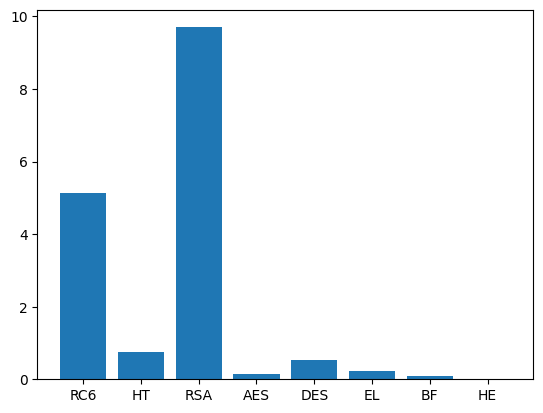

In [ ]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

data = [5.125, 0.76,9.7, 0.14, 0.542,0.24,0.1,0.000019]
width = 0.25
plt.bar(["RC6","HT","RSA","AES","DES","EL","BF","HE"],data)
plt.show()


In [ ]:
a = 546313 
b = 37385 

a_xor_b = a ^ b
print("a ^ b =", a_xor_b)

bin_a_xor_b = bin(a_xor_b)
print("the result in decimal =", bin_a_xor_b)

one_count = 0
for i in bin_a_xor_b:
  if i == "1":  
      one_count+=1
      print ("the 1s numbers is=", one_count)

len_a = len(bin(a))
len_b = len(bin(b))

if (len_a) >= (len_b):
    AVA = (one_count/ len (bin(a))) * 100
else:
    AVA = (one_count/ len (bin(b))) * 100
print ("avalanche effect =", AVA, "%")

a ^ b = 574464
the result in decimal = 0b10001100010000000000
the 1s numbers is= 1
the 1s numbers is= 2
the 1s numbers is= 3
the 1s numbers is= 4
avalanche effect = 18.181818181818183 %


In [ ]:
data1 = [5.125,0.76,9.7,0.14,0.542,0.24,0.1,0.000019]
data2 = ["AES","BLOWFISH","RSA","ELGAMMAL","DES","RC6","LIGHT","HE"]
e_l = []
for i in data1:
    throughput = 128/i
    e_l.append(throughput)
print(e_l)


[24.975609756097562, 168.42105263157896, 13.195876288659795, 914.2857142857142, 236.16236162361622, 533.3333333333334, 1280.0, 6736842.105263158]


In [ ]:
for x,y in zip(data2,e_l):
  print(x,y)

AES 24.975609756097562
BLOWFISH 168.42105263157896
RSA 13.195876288659795
ELGAMMAL 914.2857142857142
DES 236.16236162361622
RC6 533.3333333333334
LIGHT 1280.0
HE 6736842.105263158


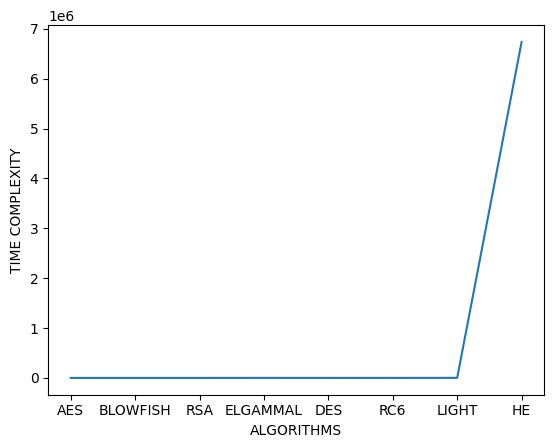

In [ ]:
import matplotlib.pyplot as plt
plt.xlabel("ALGORITHMS")
plt.ylabel("TIME COMPLEXITY")
plt.plot(data2,e_l)

In [ ]:
pip install big-O

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for big-O: filename=big_O-0.10.2-py3-none-any.whl size=10036 sha256=fbc75ecdf4c968ce2e67b202e99537ddcd614431c96a31b89d0833ceabda6028
  Stored in directory: /root/.cache/pip/wheels/49/30/2e/37ad90b87d466e3299baf77f6a265929258538dcf43b9f4a9a
Successfully built big-O


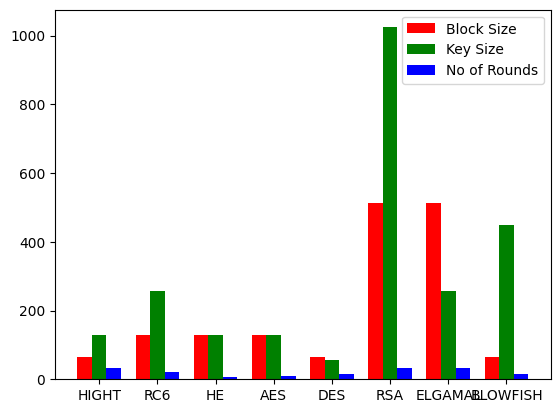

In [11]:
import numpy as np
import matplotlib.pyplot as plt

N = 8
ind = np.arange(N)
width = 0.25

xvals = [64,128,128,128,64,512,512,64]
bar1 = plt.bar(ind, xvals, width, color = 'r')

yvals = [128,256,128,128,56,1024,256,448]
bar2 = plt.bar(ind+width, yvals, width, color='g')

zvals = [32,20,7,10,16,32,32,16]
bar3 = plt.bar(ind+width*2, zvals, width, color = 'b')

plt.xticks(ind+width,['HIGHT', 'RC6', 'HE','AES','DES','RSA','ELGAMAL','BLOWFISH'])
plt.legend( (bar1, bar2, bar3), ('Block Size', 'Key Size', 'No of Rounds') )
plt.show()
